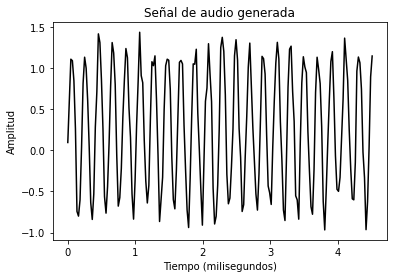

In [8]:
# GENERACIÓN DE AUDIO

# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

#en este tercero vamos a ver que tambien se puede crear audio

# Archivo de salida en el cual se grabará el audio 
archivo_salida = 'audio_generado.wav'

#entonces yo creo un archivo llamado audio_generado.wav y a continuacion establezco la duración, 
#la frecuencia de muestreo, la frecuencia del tono principal, el valor minimo y máximo de la señal

# Especificar los parámetros del audio
duracion = 4  # in seconds
frecuencia_muestreo = 44100  # in Hz
frecuencia_tono = 784 
valor_minimo = -4 * np.pi
valor_maximo = 4 * np.pi

# Generar la señal de audio
t = np.linspace(valor_minimo, valor_maximo, duracion * frecuencia_muestreo)
senial = np.sin(2 * np.pi * frecuencia_tono * t)

#le puedo agregar ruido a la senal

#luego genero la señal de audio, él tiene como generarlo

# Agregar algún ruido a la señal
ruido = 0.5 * np.random.rand(duracion * frecuencia_muestreo)
senial += ruido

# Escalar a valores enteros de 16 bits
factor_escalamiento = np.power(2, 15) - 1
senial_normalizada = senial / np.max(np.abs(senial))
senial_escalada = np.int16(senial_normalizada * factor_escalamiento)

#luego escalo los valores porque tengo que hacer un escalamiento porque siempre que uno lo crea, 
#se crean rangos que no  son adecuados para poder ser visualizados

# Almacenar la señal de audio en el archivo de salida 
write(archivo_salida, frecuencia_muestreo, senial_escalada)

#se almacena la señal de audio

# Extraer los primeros 200 valores de la señal de audio
senial = senial[:200]

#extraigo los primeros 200 valores para ver que son

# Construir el eje del tiempo en milisegundos
eje_tiempo = 1000 * np.arange(0, len(senial), 1) / float(frecuencia_muestreo) 

#construyo el eje del tiempo en milésimas de segundo

# Graficar la señal de audio
plt.plot(eje_tiempo, senial, color='black')
plt.xlabel('Tiempo (milisegundos)')
plt.ylabel('Amplitud')
plt.title('Señal de audio generada')
plt.show()

#y lo grafico